In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)


from astropy.io import ascii
from astropy.io import fits
from astropy.table import Table, Column, join
from astropy.wcs import WCS

In [2]:
# Plotting Parameters
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] =18
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['figure.titlesize'] = 20
plt.rcParams['axes.labelweight']='bold'
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['xtick.major.size'] = 7
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['ytick.major.size'] = 7
plt.rcParams['ytick.minor.size'] = 5

In [3]:
# Reduced data in txt files
red_dat_path = "A:/Documents/Grad_School/Research/igrins_reduced_text/"
fig_path = "A:/Documents/Grad_School/Research/"
# Glob the H band txt files
k_spec_files = glob.glob(red_dat_path+"*_K_*.txt")

In [4]:
# Preliminary look at hbc427, an M5 spectral type in Taurus, total int time of 300
hbc427_files = glob.glob(red_dat_path+"*hbc427*_k_*")
hbc427_files

['A:/Documents/Grad_School/Research/igrins_reduced_text\\HBC427_20171229_K_0048_spec_A0v (1).txt',
 'A:/Documents/Grad_School/Research/igrins_reduced_text\\HBC427_20171229_K_0048_spec_A0v.txt',
 'A:/Documents/Grad_School/Research/igrins_reduced_text\\HBC427_20171229_K_0064_spec_A0v (1).txt',
 'A:/Documents/Grad_School/Research/igrins_reduced_text\\HBC427_20171229_K_0064_spec_A0v.txt']

In [5]:
# Use pandas to read the .txt file and create a data frame
# Skip first few lines of header, change "-NaN" to NaN in the signal-to-noise columns
hbc427_df = pd.read_csv(hbc427_files[0],skiprows=7, delim_whitespace=True,na_values=['-NaN'])
# Make column names
hbc427_df.columns = ["Spectral Index", "Wavelength", "Flux", "SNR"]
# Define thresholds for SNR and Flux
snr_threshold = 5
flux_threshold = 0
# Do the selection using pandas dataframe magic
hbc427_df = hbc427_df[(hbc427_df["SNR"] > snr_threshold) & (hbc427_df["Flux"] > flux_threshold)]
hbc427_df

,Spectral Index,Wavelength,Flux,SNR
1834,0.0,1.87058,8.557040e+06,6.04781
1873,0.0,1.87102,3.295990e+06,5.22275
2478,1.0,1.87228,4.054250e+09,86.58210
2734,1.0,1.87571,1.387250e+07,8.15636
2944,1.0,1.87846,1.632870e+06,5.24463
...,...,...,...,...
52129,25.0,2.50115,8.276700e+04,5.81407
52133,25.0,2.50122,6.127770e+04,5.06282
52136,25.0,2.50127,7.076120e+04,5.24191
52178,25.0,2.50198,1.053350e+05,5.10821


In [6]:
# Wavelength (microns)
hbc427_wavlen = hbc427_df['Wavelength']
# Flux (counts)
hbc427_flux = hbc427_df['Flux']

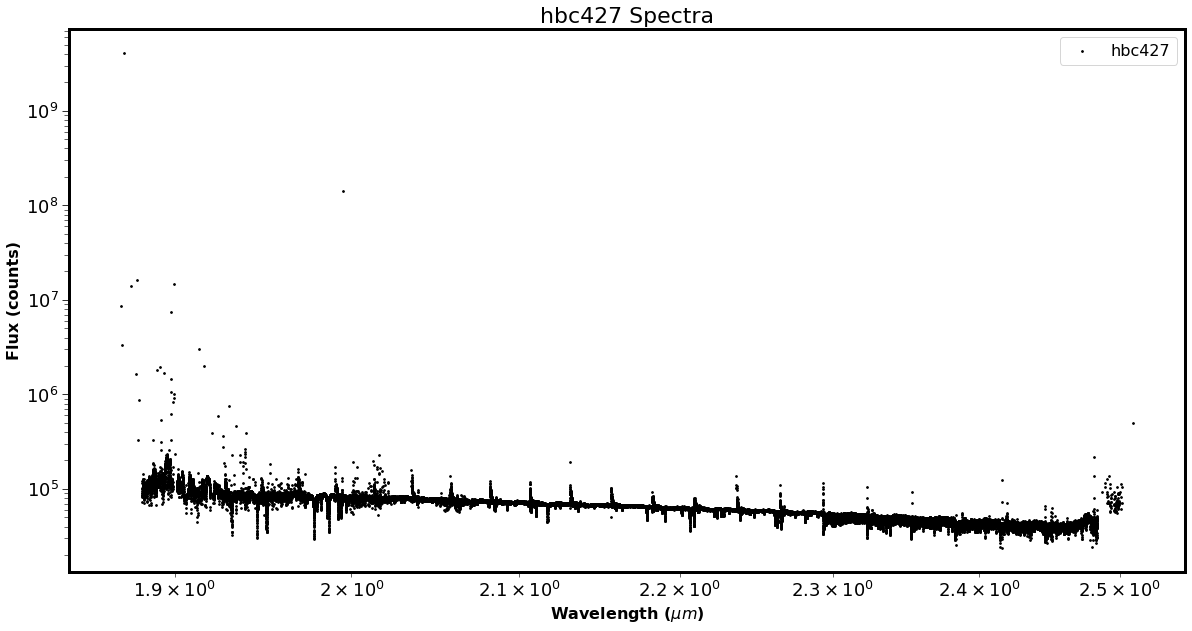

In [8]:
# for wavlen,flux in zip(hbc427_wavlen,hbc427_flux):

fig,ax = plt.subplots(figsize=(20,10))

# Plot wavelength vs flux
# there is definitely a way to do this with a for loop but oh well
ax.scatter(hbc427_wavlen, hbc427_flux,label="hbc427",s=3,c="black")

# ax.set_xlim(1.55,1.56)
ax.set_xscale('log')
ax.set_yscale('log')

ax.legend(loc='best')

ax.set_title("hbc427 Spectra", fontsize = 22)
ax.set_xlabel('Wavelength ($\mu m$)',fontsize=16)
ax.set_ylabel('Flux (counts)',fontsize=16)

plt.savefig(fig_path + "hbc427_igrins_spectra" + '.png',facecolor='white')
plt.show()